In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
X_train = np.loadtxt('train_X.csv', delimiter = ',').T
Y_train = np.loadtxt('train_label.csv', delimiter = ',').T

X_test = np.loadtxt('test_X.csv', delimiter = ',').T
Y_test = np.loadtxt('test_label.csv', delimiter = ',').T

In [3]:
print("shape of X_train :", X_train.shape)
print("shape of Y_train :", Y_train.shape)
print("shape of X_test :", X_test.shape)
print("shape of Y_test :", Y_test.shape)

shape of X_train : (784, 1000)
shape of Y_train : (10, 1000)
shape of X_test : (784, 350)
shape of Y_test : (10, 350)


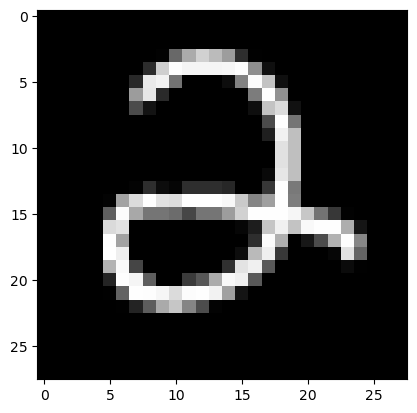

2


In [4]:
index = random.randrange(0, X_train.shape[1])
plt.imshow(X_train[:, index].reshape(28, 28), cmap = 'gray')
plt.show()
arr = Y_train[:,index]
index2 = np.where(arr == 1)[0][0]
print(index2)

# Activation Functions And It's Derivative

In [5]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX, axis = 0)

In [6]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

## Initialize Parameters

In [7]:
def initialize_parameters(n_x, n_h, n_y):
    w1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    
    w2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

## Forward Propagation


In [8]:
def forward_propagation(x, parameters):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    z1 = np.dot(w1, x) + b1
    a1 = tanh(z1)
    
    z2 = np.dot(w2, a1) + b2
    a2 = softmax(z2)
    
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    return forward_cache

## Cost Function

In [9]:
def cost_function(a2, y):
    m = y.shape[1]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    return cost

# Backpropagation

In [10]:
def backward_prop(x, y, parameters, forward_cache):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    m = x.shape[1]
    
    dz2 = (a2 - y)
    dw2 = (1/m)*np.dot(dz2, a1.T)
    db2 = (1/m)*np.sum(dz2, axis = 1, keepdims = True)
    
    dz1 = (1/m)*np.dot(w2.T, dz2)*derivative_tanh(a1)
    dw1 = (1/m)*np.dot(dz1, x.T)
    db1 = (1/m)*np.sum(dz1, axis = 1, keepdims = True)
    
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }
    
    return gradients

# Update Parameters

In [11]:
def update_parameters(parameters, gradients, learning_rate):
    
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    
    return parameters

# Complete Model

In [12]:
def model(x, y, xt, yt, n_h, learning_rate, iterations):
    
    n_x = x.shape[0]
    n_y = y.shape[0]
    
    cost_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(iterations):
        
        forward_cache = forward_propagation(x, parameters)
        
        cost = cost_function(forward_cache['a2'], y)
        
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost)
        
        if(i%(iterations/10) == 0):
            print("Cost after", i, "iterations is :", cost)
 
    return parameters, cost_list,train_accuracy_list,test_accuracy_list



In [14]:
iterations = 200
n_h = 1000
learning_rate = 0.02
Parameters, Cost_list,train_accuracy_list,test_accuracy_list= model(X_train, Y_train,X_test,Y_test, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

Cost after 0 iterations is : 2.3412853406643737
Cost after 20 iterations is : 0.8338983282092065
Cost after 40 iterations is : 0.5607764764593879
Cost after 60 iterations is : 0.438855161173501
Cost after 80 iterations is : 0.365376924470806
Cost after 100 iterations is : 0.3144496774263864
Cost after 120 iterations is : 0.27624773162129984
Cost after 140 iterations is : 0.2461265734846674
Cost after 160 iterations is : 0.22156318776766007
Cost after 180 iterations is : 0.2010471321326234


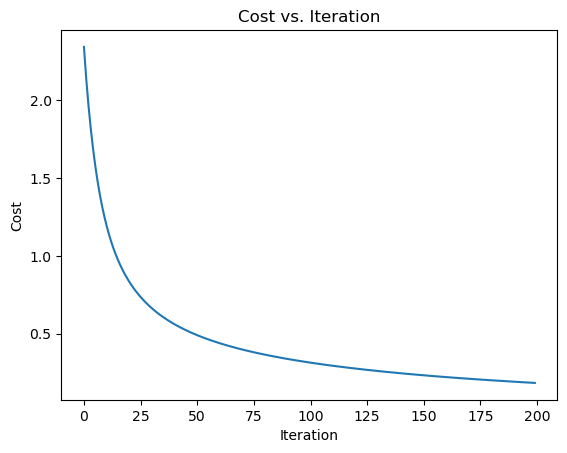

In [15]:
t = np.arange(0, iterations)
plt.plot(t, Cost_list)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')
plt.show()

In [16]:
def accuracy(x, y, parameters):   
    forward_cache = forward_propagation(x, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    labels = np.argmax(y, 0)
    
    acc = np.mean(a_out == labels)*100
    
    acc_values = [acc]
    return acc

In [17]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", accuracy(X_test, Y_test, Parameters), "%")

Accuracy of Train Dataset 98.6 %
Accuracy of Test Dataset 86.28571428571429 %


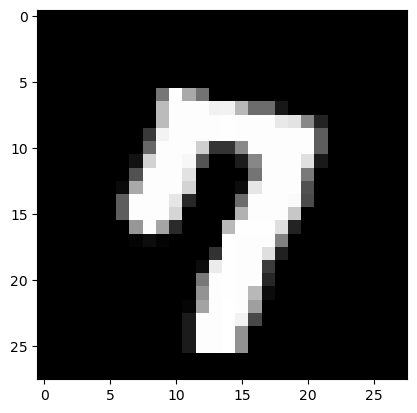

Our model says it is : 7


In [18]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_propagation(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

In [19]:
cache['a2']

array([[7.67272723e-04],
       [5.98617492e-05],
       [9.65735844e-05],
       [7.81857616e-04],
       [4.54393867e-02],
       [2.77069257e-03],
       [6.59116040e-04],
       [8.20803832e-01],
       [8.48408162e-04],
       [1.27772999e-01]])

In [20]:
import cv2

Input image


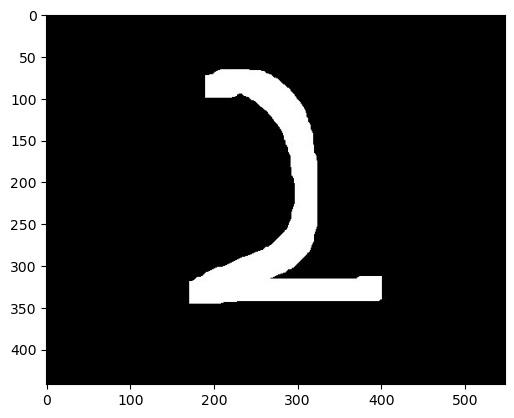

In [21]:
# Load the RGB image
img = cv2.imread('input2.jpg')
# cv2.imshow("Input image", img)
input_image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print("Input image")
plt.imshow(input_image_rgb)

In [22]:
# Convert the RGB image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary image
# a, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

cv2.imwrite('binary.jpg', gray)

True

In [23]:
# resize the image to 28x28
img = cv2.imread('binary.jpg')
resized_img = cv2.resize(img, (28, 28))
cv2.imwrite('output.jpg', resized_img)

True

In [24]:
#get the size of the image

image = cv2.imread("output.jpg")

# Get the size of the image
height, width, channels = image.shape
print("Image Size - Width: {} pixels, Height: {} pixels, Channels: {}".format(width, height, channels))



Image Size - Width: 28 pixels, Height: 28 pixels, Channels: 3


In [25]:
# convert image to an arry

img = cv2.imread('output.jpg')

# Convert the image to a NumPy array
img_array = np.array(img)

# Print the shape of the array (height, width, channels)
print(img_array.shape)

# Print the pixel values at a specific location (x, y)
x, y = 8,10
print(f'The pixel values at location ({x}, {y}) are {img_array[y, x]}')

(28, 28, 3)
The pixel values at location (8, 10) are [0 0 0]


In [26]:
# remove the rgb channel and reshape the image to 784 x 1

new_array = img_array[:, :, 0]
print(new_array.shape)

x_example=new_array.reshape((784,1))
print(x_example.shape)

(28, 28)
(784, 1)


In [27]:
cache2 = forward_propagation(x_example, Parameters)
i_pred = cache2['a2']  
i_pred = np.argmax(i_pred)

# print("Our model says it is :", i_pred)

processed input image is : 


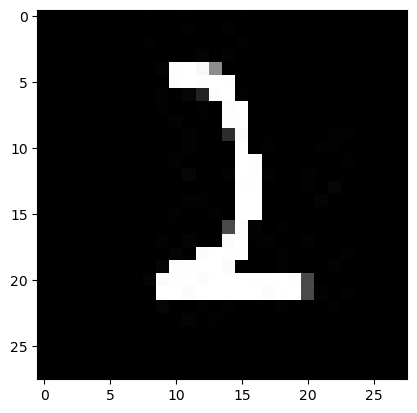

Our model says it is : 2


In [28]:
plt.imshow(new_array,cmap='gray')
print("processed input image is : ")
plt.show()
print("Our model says it is :", i_pred)

In [29]:
cache2['a2']  

array([[5.49799156e-04],
       [6.45969976e-02],
       [8.17192870e-01],
       [3.23816047e-03],
       [2.15881231e-04],
       [4.64268556e-03],
       [1.01266634e-01],
       [6.32253584e-03],
       [1.44576916e-03],
       [5.28666699e-04]])